## 회귀분석 (Regression)


- 독립변수(X)와 종속변수(Y)의 관계식에서
  독립변수가 한 단위 증가할 때 종속변수가 얼마나 영향을 받는지 분석
  

[예] 연속형변수와 연속형 변수를 비교할 때


- 나이(X)가 많을 수록 소득(Y)가 높은지 분석
- 광고지불비(X)에 따라 판매량이 영향을 받는지 분석
- 가계 수입과 사교육비 지출 사이에 관계가 있는지 분석
- 신종코로나 추이 분석 (https://news.v.daum.net/v/20200213050105962)


[참고] 
<img src='./imgs/regression1.png' width='500'>
<img src='./imgs/regression2.png' width='500'>
<img src='./imgs/regression3.png' width='500'>

** 회귀분석 종류

1) 단순회귀 분석 : 독립변수가 1개
        
        ` 광고지불비(X)를 이용하여 상품 매출액(Y) 예측할 때
        
2) 다중회귀 분석 : 독립변수가 2개 이상
       
       ` 어린이 연령(X1)과 하루 평균 학습시간(X2)를 이용하여 그 어린이의 성적(Y)을 예측하고자 할 때



In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from scipy import stats
from matplotlib import font_manager, rc
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.datasets import make_regression

# 한글 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

### 단순회귀분석 ( 선형회귀분석 )

- 독립변수가 1개인 경우

- 전기생산량(독립변수)과 전기소비량(종속변수)의 영향


    - 귀무가설 : 전기생산량과 전기소비량 간에 상관관계가 없다
    - 대립가설 : 전기생산량과 전기소비량 간에 상관관계가 있다

In [11]:
# 월별 전기생산금액
x= [3.52, 2.51, 3.91, 4.07, 3.98, 4.29, 4.81, 3.73, 4.61, 3.39, 3.20]
X = [24,25,26,27,28,29,30,31,35]

# 월별 전기 사용량
y= [2.48, 2.27, 2.47, 2.37, 3.09, 3.18, 3.88, 3.03, 3.55, 2.99, 2.88]
Y = [22,25,28,30,33,34,36,32,38]

In [12]:
##### 단순회귀분석

result = stats.linregress(x,y)
result
result = stats.linregress(X,Y)
result


LinregressResult(slope=1.373188405797102, intercept=-8.018115942029002, rvalue=0.8984978897043425, pvalue=0.0009920766585233877, stderr=0.25357512114754505)

- 기울기(slope)
- 절편(intercept)
- 상관계수(rvalue) :상관관계의 정도를 파악하는 값 ( -1에서 1 )
                    - 1에 근접하면 양의 상관관계
                    - -1에 근접하면 음의 상관관계
                    - 0에 근접하면 상관관계가 없다
- pvalue : 예측 불확실성의 정도를 나타내는 값
- 에러의 표준편차(stderr)


* 상관분석 : 두 변수 간에 선형적 관계가 있는지 분석
* 상관계수 : 상관관계의 정도를 파악하는 값 ( -1에서 1 )
                    - 1에 근접하면 양의 상관관계
                    - -1에 근접하면 음의 상관관계
                    - 0에 근접하면 상관관계가 없다
                    
1) pvalue가 0.05보다 작으므로 통계적으로 유의미하기에
귀무가설을 기각하고 대립가설을 채택하여
전기생랸량과 소비생산량 간에 상관관계가 있다 

2) rvalue(상관계수)가 1에 가까우므로 양의 상관관계가 있다고 볼 수 있다 

분석결과:======================
r_value(상관계수) :  0.8984978897043425
유의미한 결과


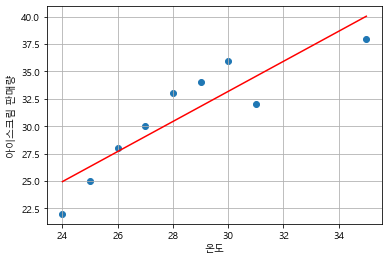

In [19]:
##### 선형 회귀 분석값 얻어오기

# slope,intercept,r_value,p_value,stderr = stats.linregress(x,y)
# if p_value<0.5:
#     print('통계적으로 유의미한 데이타')
# else:
#     print('통계적으로 유의미한 데이터가 아니다')
# ##### 산점도 그리기
# plt.scatter(x,y)


# ##### 회귀선 그리기
# x1 = np.array(x)
# plt.plot(x1,x1*slope+intercept,c='red')
# plt.xlabel('전기생산량')
# plt.ylabel('전기사용량')

slope,intercept,r_value,p_value,stderr = stats.linregress(X,Y)

plt.scatter(X,Y)

X1 = np.array(X)
plt.plot(X1,X1*slope+intercept,c='red')
plt.xlabel('온도')
plt.ylabel('아이스크림 판매량')
plt.grid(True)

print('분석결과:======================')
print('r_value(상관계수) : ',r_value)
if p_value<0.5:
    print('유의미한 결과')
else:
    print('유의미하지 않은 결과')

In [5]:
# 전기 생상량이 4라면 전기소비량이 얼마인가?
4*slope+intercept

3.0262066023550878

### 회귀분석 예제 - 단순회귀분석(선형회귀분석)

#### 오존 데이터셋에서 온도에 따른 오존량 예측

- 독립변수 : 온도(수치형),   종속변수 : 오존량(수치형)
- 독립변수가 하나이기에 단순회귀분석(선형회귀분석) 적용


- 귀무가설 : 온도가 오존량에 영향을 미치지 않는다
- 대립가설 : 온도가 오존량에 영향을 미친다


In [6]:
df = pd.read_csv('../data/ozone/ozone.csv')
df.head()
df.tail()


,Ozone,Solar.R,Wind,Temp,Month,Day
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29
152,20.0,223.0,11.5,68,9,30


----------------------------------------------
[ * 작업단계 *]

1.  결측치 행 제거

2. 온도(Temp) 데이타 X와 오존(Ozone) 데이타 Y를 추출

3. 회귀분석 결과 출력

[ *  회귀 분석의 결과에 대한 분석 * ]

In [7]:
df2 = df.dropna()
df2

x = df2['Temp'].values
y=df2['Ozone'].values

result=stats.linregress(x,y)
result

LinregressResult(slope=2.439109905529362, intercept=-147.64607238059494, rvalue=0.6985414096486389, pvalue=1.552677229392932e-17, stderr=0.23931937849409174)

[ 결과 분석 ]

1. rvalue 가 0.7는 두 변수는 양의 상관관계가 있다

2. pvalue 1.55*10(-17) = 0.0000000000000155는 0.05보다 어마무시 작다

3. 대립가설을 채택한다

    온도가 오존량에 영향을 미친다

------------------------------------------------------
[ * 작업단계 *]

4. 산점도와 회귀선 그리기

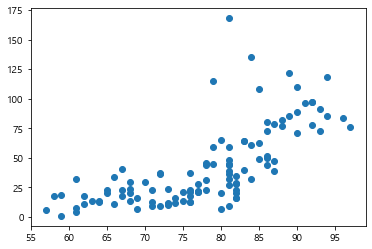

In [8]:
plt.scatter(x,y)

## 회귀분석 예제 - 보스턴 주택가격

- mglearn 패키지 설치

콘솔에서 > pip install mglearn 

또는

쥬피터에서는 !pip install mglearn 


In [9]:

import mglearn

# 보스턴 주택가격 데이터셋
from sklearn.datasets import load_boston

# 회귀분석을 위한 패키기
from sklearn.linear_model import LinearRegression

# 학습용, 검증용 데이터를 나누기 위한 패키기
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'mglearn'

속성정보:
    - CRIM     인구 1인당 범죄 수
    - ZN       25000평방 피트 이상의 주거 구역 비중
    - INDUS    소매업 외 상업이 차지하는 면접 비율
    - CHAS     찰스강 위치 변수 (1: 강주변, 0:이외 )
    - NOX      일산화질소 농도 (parts per 10 million)
    - RM       집의 평균 방수
    - AGE      1940년 이전에 지어진 비율
    - DIS      5가지 보스턴 시 고용 시설까지의 거리
    - RAD      순환고속도로의 접근 용이성
    - TAX      $10000 달러당 부동산 세율 총계

    - PTRATIO  지역별 학생과 교사 비율
    - B        지역별 흑인 비율
    - LSTAT    급여가 낮은 직업에 종사하는 인구 비율(%)
    - MEDV     가격단위($1000)